In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the BPost Postal Codes Dataset

post_code_df = pd.read_csv('../data/raw/zipcodes_num_nl_new.csv')
post_code_df.head()

,Postcode,Plaatsnaam,Deelgemeente,Hoofdgemeente,Provincie
0,612,Sinterklaas,NaN,Sinterklaas,NaN
1,1000,Brussel,Neen,BRUSSEL,BRUSSEL
2,1005,Verenigde Vergadering van de Gemeenschappelijke,NaN,Verenigde Vergadering van de Gemeenschappelijke,BRUSSEL
3,1006,Raad van de Vlaamse Gemeenschapscommissie,NaN,Raad van de Vlaamse Gemeenschapscommissie,BRUSSEL
4,1007,Assemblée de la Commission Communautaire Franç...,NaN,Assemblée de la Commission Communautaire Franç...,BRUSSEL


In [3]:
# Function to parse the 'Build Year' feature with date type

def parse_year(year):
    return pd.to_datetime(str(year), format='%Y')

In [4]:
# Load our raw data

# immo_raw_df = pd.read_csv('../data/raw/rawdata.csv', parse_dates=['Build Year'], date_format=parse_year)
immo_raw_df = pd.read_csv('../data/raw/rawdata.csv')
immo_raw_df.head()

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Has starting Price,Transaction Subtype,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count
0,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000.0,...,False,BUY_REGULAR,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,11149932,Wetteren,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,339000.0,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,11150061,Ixelles,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,495000.0,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11153822,BERCHEM,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,175000.0,...,NaN,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,11153121,Jette,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,289000.0,...,False,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
immo_raw_df.shape

(21796, 43)

In [6]:
# checking for duplicate rows

immo_raw_df.duplicated().sum()

0

In [7]:
# Merge our raw data with Postal Codes

immo_raw_df = pd.merge(immo_raw_df, post_code_df, left_on='Postal Code', right_on='Postcode', how='inner')
del immo_raw_df['Postcode']
del immo_raw_df['Plaatsnaam']
del immo_raw_df['Deelgemeente']

immo_raw_df.rename(columns={'Hoofdgemeente':'Municipality', 'Provincie': 'Province'}, inplace=True)

immo_raw_df

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000.0,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
1,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000.0,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
2,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000.0,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
3,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000.0,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
4,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000.0,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54531,11193810,SERAING,4100,NaN,2.0,92.0,221.0,HOUSE,HOUSE,90000.0,...,FUELOIL,NaN,True,CONNECTED,NaN,NaN,NaN,NaN,SERAING,LUIK
54532,11193810,SERAING,4100,NaN,2.0,92.0,221.0,HOUSE,HOUSE,90000.0,...,FUELOIL,NaN,True,CONNECTED,NaN,NaN,NaN,NaN,SERAING,LUIK
54533,11193807,Brugge,8000,NaN,NaN,79.0,43.0,HOUSE,HOUSE,349000.0,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRUGGE,WEST-VLAANDEREN
54534,11193807,Brugge,8000,NaN,NaN,79.0,43.0,HOUSE,HOUSE,349000.0,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRUGGE,WEST-VLAANDEREN


In [8]:
immo_raw_df.shape

(54536, 45)

In [9]:
immo_raw_df.describe()

,ID,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Price,Bedroom Count,Bathroom Count,Toilet Count,...,Kitchen Surface,Fireplace Count,Terrace Surface,Garden Surface,Living Surface,Consumption Per m2,Cadastral Income,Parking count inside,Parking count outside,Parking box count
count,5.453600e+04,54536.000000,39264.000000,39758.000000,51929.000000,26815.000000,5.453200e+04,54120.000000,47739.000000,41693.000000,...,21062.000000,7850.000000,28623.000000,10866.000000,26942.000000,33217.000000,54536.000000,20959.000000,19786.000000,0.0
mean,1.105075e+07,5987.638294,1992.925733,2.892374,151.096324,924.270073,3.924863e+05,2.716223,1.287647,1.617538,...,13.007549,-0.666752,22.415295,593.942941,34.212865,376.047164,363.409454,10.281263,5.257455,NaN
std,3.237799e+05,3142.593618,83.629473,0.858129,165.393147,2530.654298,3.193630e+05,1.412434,0.706470,0.871716,...,22.676204,0.768886,43.076426,2385.595975,30.501881,3051.274167,2787.903805,422.253457,68.159030,NaN
min,7.309243e+06,1000.000000,1768.000000,1.000000,12.000000,0.000000,1.000000e+04,0.000000,1.000000,1.000000,...,1.000000,-1.000000,1.000000,1.000000,1.000000,-18.000000,0.000000,1.000000,1.000000,NaN
25%,1.106874e+07,3000.000000,1968.000000,2.000000,93.000000,195.000000,2.566500e+05,2.000000,1.000000,1.000000,...,8.000000,-1.000000,9.000000,62.000000,26.000000,96.000000,0.000000,1.000000,1.000000,NaN
50%,1.115900e+07,6640.000000,2020.000000,3.000000,123.000000,391.000000,3.310000e+05,3.000000,1.000000,1.000000,...,11.000000,-1.000000,15.000000,168.000000,32.000000,220.000000,0.000000,1.000000,1.000000,NaN
75%,1.119521e+07,9140.000000,2023.000000,4.000000,177.000000,888.000000,4.300000e+05,3.000000,1.000000,2.000000,...,15.000000,-1.000000,25.000000,493.750000,40.000000,379.000000,588.250000,2.000000,3.000000,NaN
max,1.120674e+07,9991.000000,9999.000000,9.000000,7819.000000,59273.000000,2.250000e+07,60.000000,20.000000,41.000000,...,1317.000000,8.000000,3466.000000,80000.000000,4146.000000,137833.000000,630175.000000,25000.000000,6500.000000,NaN


In [10]:
immo_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     54536 non-null  int64  
 1   Locality               54536 non-null  object 
 2   Postal Code            54536 non-null  int64  
 3   Build Year             39264 non-null  float64
 4   Facades                39758 non-null  float64
 5   Habitable Surface      51929 non-null  float64
 6   Land Surface           26815 non-null  float64
 7   Type                   54536 non-null  object 
 8   Subtype                54535 non-null  object 
 9   Price                  54532 non-null  float64
 10  Sale Type              54536 non-null  object 
 11  Bedroom Count          54120 non-null  float64
 12  Bathroom Count         47739 non-null  float64
 13  Toilet Count           41693 non-null  float64
 14  Room Count             53734 non-null  float64
 15  Ki

In [11]:
# checking for duplicate rows

immo_raw_df.duplicated().sum()

32745

In [12]:
# Deleting duplicate rows
 
immo_raw_df = immo_raw_df.drop_duplicates()
immo_raw_df.shape

(21791, 45)

In [13]:
# checking for duplicate rows

immo_raw_df.duplicated().sum()

0

In [14]:
immo_raw_df['Swimming Pool'] = immo_raw_df['Swimming Pool'].fillna(False)
immo_raw_df['Has starting Price'] = immo_raw_df['Has starting Price'].fillna(False)
immo_raw_df['Is Holiday Property'] = immo_raw_df['Is Holiday Property'].fillna(False)
immo_raw_df['Sewer'] = immo_raw_df['Sewer'].fillna(False)
immo_raw_df['Sea view'] = immo_raw_df['Sea view'].fillna(False)

/tmp/ipykernel_44274/2368955232.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  immo_raw_df['Swimming Pool'] = immo_raw_df['Swimming Pool'].fillna(False)
/tmp/ipykernel_44274/2368955232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_raw_df['Swimming Pool'] = immo_raw_df['Swimming Pool'].fillna(False)
/tmp/ipykernel_44274/2368955232.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in 

In [15]:
immo_raw_df

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000.0,...,FUELOIL,False,NaN,False,False,1.0,1.0,NaN,WAREMME,LUIK
7,11149932,Wetteren,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,339000.0,...,GAS,False,NaN,False,False,NaN,1.0,NaN,WETTEREN,OOST-VLAANDEREN
10,11150061,Ixelles,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,495000.0,...,GAS,False,NaN,False,False,NaN,NaN,NaN,ELSENE,BRUSSEL
11,11153822,BERCHEM,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,175000.0,...,NaN,False,NaN,False,False,NaN,1.0,NaN,ANTWERPEN,ANTWERPEN
12,11153121,Jette,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,289000.0,...,NaN,False,NaN,False,False,NaN,NaN,NaN,JETTE,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54527,11193812,Herentals,2200,1938.0,3.0,100.0,344.0,HOUSE,HOUSE,220000.0,...,GAS,False,True,CONNECTED,False,1.0,NaN,NaN,HERENTALS,ANTWERPEN
54530,11193811,Sint-Amandsberg,9040,1955.0,4.0,168.0,153.0,HOUSE,HOUSE,399000.0,...,GAS,False,True,CONNECTED,False,NaN,1.0,NaN,GENT,OOST-VLAANDEREN
54531,11193810,SERAING,4100,NaN,2.0,92.0,221.0,HOUSE,HOUSE,90000.0,...,FUELOIL,False,True,CONNECTED,False,NaN,NaN,NaN,SERAING,LUIK
54533,11193807,Brugge,8000,NaN,NaN,79.0,43.0,HOUSE,HOUSE,349000.0,...,GAS,False,NaN,False,False,NaN,NaN,NaN,BRUGGE,WEST-VLAANDEREN


In [16]:
# Putting correct type in boolean features

immo_raw_df['Swimming Pool'] = immo_raw_df['Swimming Pool'].astype(bool) 
immo_raw_df['Has starting Price'] = immo_raw_df['Has starting Price'].astype(bool) 
immo_raw_df['Is Holiday Property'] = immo_raw_df['Is Holiday Property'].astype(bool) 
immo_raw_df['Sewer'] = immo_raw_df['Sewer'].astype(bool) 
immo_raw_df['Sea view'] = immo_raw_df['Sea view'].astype(bool) 

/tmp/ipykernel_44274/1794780501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_raw_df['Swimming Pool'] = immo_raw_df['Swimming Pool'].astype(bool)
/tmp/ipykernel_44274/1794780501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_raw_df['Has starting Price'] = immo_raw_df['Has starting Price'].astype(bool)
/tmp/ipykernel_44274/1794780501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [17]:
# Changing the bool type to int {True: 1, False: 0}

# Select bool columns
boolean_columns = immo_raw_df.select_dtypes(include=bool).columns

# Apply the lambda function to each element of the Boolean columns.
immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].apply(lambda x: x.map({True: 1, False: 0}))


# Change the data type of columns to int
immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].astype(int)

immo_raw_df

/tmp/ipykernel_44274/1115664358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].apply(lambda x: x.map({True: 1, False: 0}))
/tmp/ipykernel_44274/1115664358.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].astype(int)


,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000.0,...,FUELOIL,0,NaN,0,0,1.0,1.0,NaN,WAREMME,LUIK
7,11149932,Wetteren,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,339000.0,...,GAS,0,NaN,0,0,NaN,1.0,NaN,WETTEREN,OOST-VLAANDEREN
10,11150061,Ixelles,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,495000.0,...,GAS,0,NaN,0,0,NaN,NaN,NaN,ELSENE,BRUSSEL
11,11153822,BERCHEM,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,175000.0,...,NaN,0,NaN,0,0,NaN,1.0,NaN,ANTWERPEN,ANTWERPEN
12,11153121,Jette,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,289000.0,...,NaN,0,NaN,0,0,NaN,NaN,NaN,JETTE,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54527,11193812,Herentals,2200,1938.0,3.0,100.0,344.0,HOUSE,HOUSE,220000.0,...,GAS,0,True,1,0,1.0,NaN,NaN,HERENTALS,ANTWERPEN
54530,11193811,Sint-Amandsberg,9040,1955.0,4.0,168.0,153.0,HOUSE,HOUSE,399000.0,...,GAS,0,True,1,0,NaN,1.0,NaN,GENT,OOST-VLAANDEREN
54531,11193810,SERAING,4100,NaN,2.0,92.0,221.0,HOUSE,HOUSE,90000.0,...,FUELOIL,0,True,1,0,NaN,NaN,NaN,SERAING,LUIK
54533,11193807,Brugge,8000,NaN,NaN,79.0,43.0,HOUSE,HOUSE,349000.0,...,GAS,0,NaN,0,0,NaN,NaN,NaN,BRUGGE,WEST-VLAANDEREN


In [18]:
# Displaying list of Property Types  

immo_raw_df.Type.unique()

array(['APARTMENT', 'HOUSE', 'OFFICE', 'COMMERCIAL', 'LAND', 'GARAGE'],
      dtype=object)

In [19]:
immo_raw_df.Subtype.unique()

array(['APARTMENT', 'DUPLEX', 'PENTHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR',
       'HOUSE', 'VILLA', 'CHALET', 'MIXED_USE_BUILDING',
       'COUNTRY_COTTAGE', 'MANSION', 'APARTMENT_BLOCK', 'BUNGALOW',
       'TOWN_HOUSE', 'LOFT', 'MANOR_HOUSE', 'EXCEPTIONAL_PROPERTY', 'KOT',
       'OFFICES', 'COMMERCIAL_PREMISES', 'TRIPLEX', 'SERVICE_FLAT',
       'BUSINESS', 'BUILDING_LAND', 'LOCK_UP_GARAGE', 'FARMHOUSE',
       'OFFICE_BLOCK', 'OTHER_PROPERTY', 'CASTLE', 'PAVILION', nan],
      dtype=object)

In [20]:
# Getting just APARTMENT AND HOUSE

immo_AP_H =immo_raw_df[immo_raw_df['Type'].isin(['APARTMENT', 'HOUSE'])]
immo_AP_H

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000.0,...,FUELOIL,0,NaN,0,0,1.0,1.0,NaN,WAREMME,LUIK
7,11149932,Wetteren,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,339000.0,...,GAS,0,NaN,0,0,NaN,1.0,NaN,WETTEREN,OOST-VLAANDEREN
10,11150061,Ixelles,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,495000.0,...,GAS,0,NaN,0,0,NaN,NaN,NaN,ELSENE,BRUSSEL
11,11153822,BERCHEM,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,175000.0,...,NaN,0,NaN,0,0,NaN,1.0,NaN,ANTWERPEN,ANTWERPEN
12,11153121,Jette,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,289000.0,...,NaN,0,NaN,0,0,NaN,NaN,NaN,JETTE,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54527,11193812,Herentals,2200,1938.0,3.0,100.0,344.0,HOUSE,HOUSE,220000.0,...,GAS,0,True,1,0,1.0,NaN,NaN,HERENTALS,ANTWERPEN
54530,11193811,Sint-Amandsberg,9040,1955.0,4.0,168.0,153.0,HOUSE,HOUSE,399000.0,...,GAS,0,True,1,0,NaN,1.0,NaN,GENT,OOST-VLAANDEREN
54531,11193810,SERAING,4100,NaN,2.0,92.0,221.0,HOUSE,HOUSE,90000.0,...,FUELOIL,0,True,1,0,NaN,NaN,NaN,SERAING,LUIK
54533,11193807,Brugge,8000,NaN,NaN,79.0,43.0,HOUSE,HOUSE,349000.0,...,GAS,0,NaN,0,0,NaN,NaN,NaN,BRUGGE,WEST-VLAANDEREN


In [21]:
# Displaying column names

immo_AP_H.columns

Index(['ID', 'Locality', 'Postal Code', 'Build Year', 'Facades',
       'Habitable Surface', 'Land Surface', 'Type', 'Subtype', 'Price',
       'Sale Type', 'Bedroom Count', 'Bathroom Count', 'Toilet Count',
       'Room Count', 'Kitchen', 'Kitchen Surface', 'Kitchen Type', 'Furnished',
       'Openfire', 'Fireplace Count', 'Terrace', 'Terrace Surface',
       'Terrace Orientation', 'Garden Exists', 'Garden Surface',
       'Garden Orientation', 'Swimming Pool', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'Cadastral Income',
       'Has starting Price', 'Transaction Subtype', 'Heating Type',
       'Is Holiday Property', 'Gas Water Electricity', 'Sewer', 'Sea view',
       'Parking count inside', 'Parking count outside', 'Parking box count',
       'Municipality', 'Province'],
      dtype='object')

In [22]:
# Count of Locality
immo_AP_H.Locality.nunique()

2221

In [23]:
# Count of Provinces
immo_AP_H.Province.nunique()

11

In [24]:
# Count of Municipality
immo_AP_H.Municipality.nunique()

564

In [25]:
immo_AP_H.Subtype.nunique()

24

In [26]:
immo_AP_H.isnull().mean()

ID                       0.000000
Locality                 0.000000
Postal Code              0.000000
Build Year               0.278757
Facades                  0.259293
Habitable Surface        0.038419
Land Surface             0.594456
Type                     0.000000
Subtype                  0.000046
Price                    0.000046
Sale Type                0.000000
Bedroom Count            0.000000
Bathroom Count           0.121991
Toilet Count             0.251130
Room Count               0.007287
Kitchen                  0.000000
Kitchen Surface          0.684808
Kitchen Type             0.274975
Furnished                0.000000
Openfire                 0.000000
Fireplace Count          0.830966
Terrace                  0.000000
Terrace Surface          0.434370
Terrace Orientation      0.978508
Garden Exists            0.000000
Garden Surface           0.811733
Garden Orientation       0.919703
Swimming Pool            0.000000
State of Building        0.327968
Living Surface

In [27]:
immo_AP_H.isnull().sum()

ID                           0
Locality                     0
Postal Code                  0
Build Year                6044
Facades                   5622
Habitable Surface          833
Land Surface             12889
Type                         0
Subtype                      1
Price                        1
Sale Type                    0
Bedroom Count                0
Bathroom Count            2645
Toilet Count              5445
Room Count                 158
Kitchen                      0
Kitchen Surface          14848
Kitchen Type              5962
Furnished                    0
Openfire                     0
Fireplace Count          18017
Terrace                      0
Terrace Surface           9418
Terrace Orientation      21216
Garden Exists                0
Garden Surface           17600
Garden Orientation       19941
Swimming Pool                0
State of Building         7111
Living Surface           11960
EPC                       6979
Consumption Per m2        7807
Cadastra

In [28]:
immo_AP_H['Sea view'].unique()

array([0, 1])

In [29]:
from typing import List


def display_correlation_matrix(df: pd.DataFrame, columns: List = None, method: str = 'pearson'):

    if columns:
        correlation_matrix = df[columns].corr(method=method)
    else:
        correlation_matrix = df[df.select_dtypes(include=['int', 'float']).columns].corr(method=method)

    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

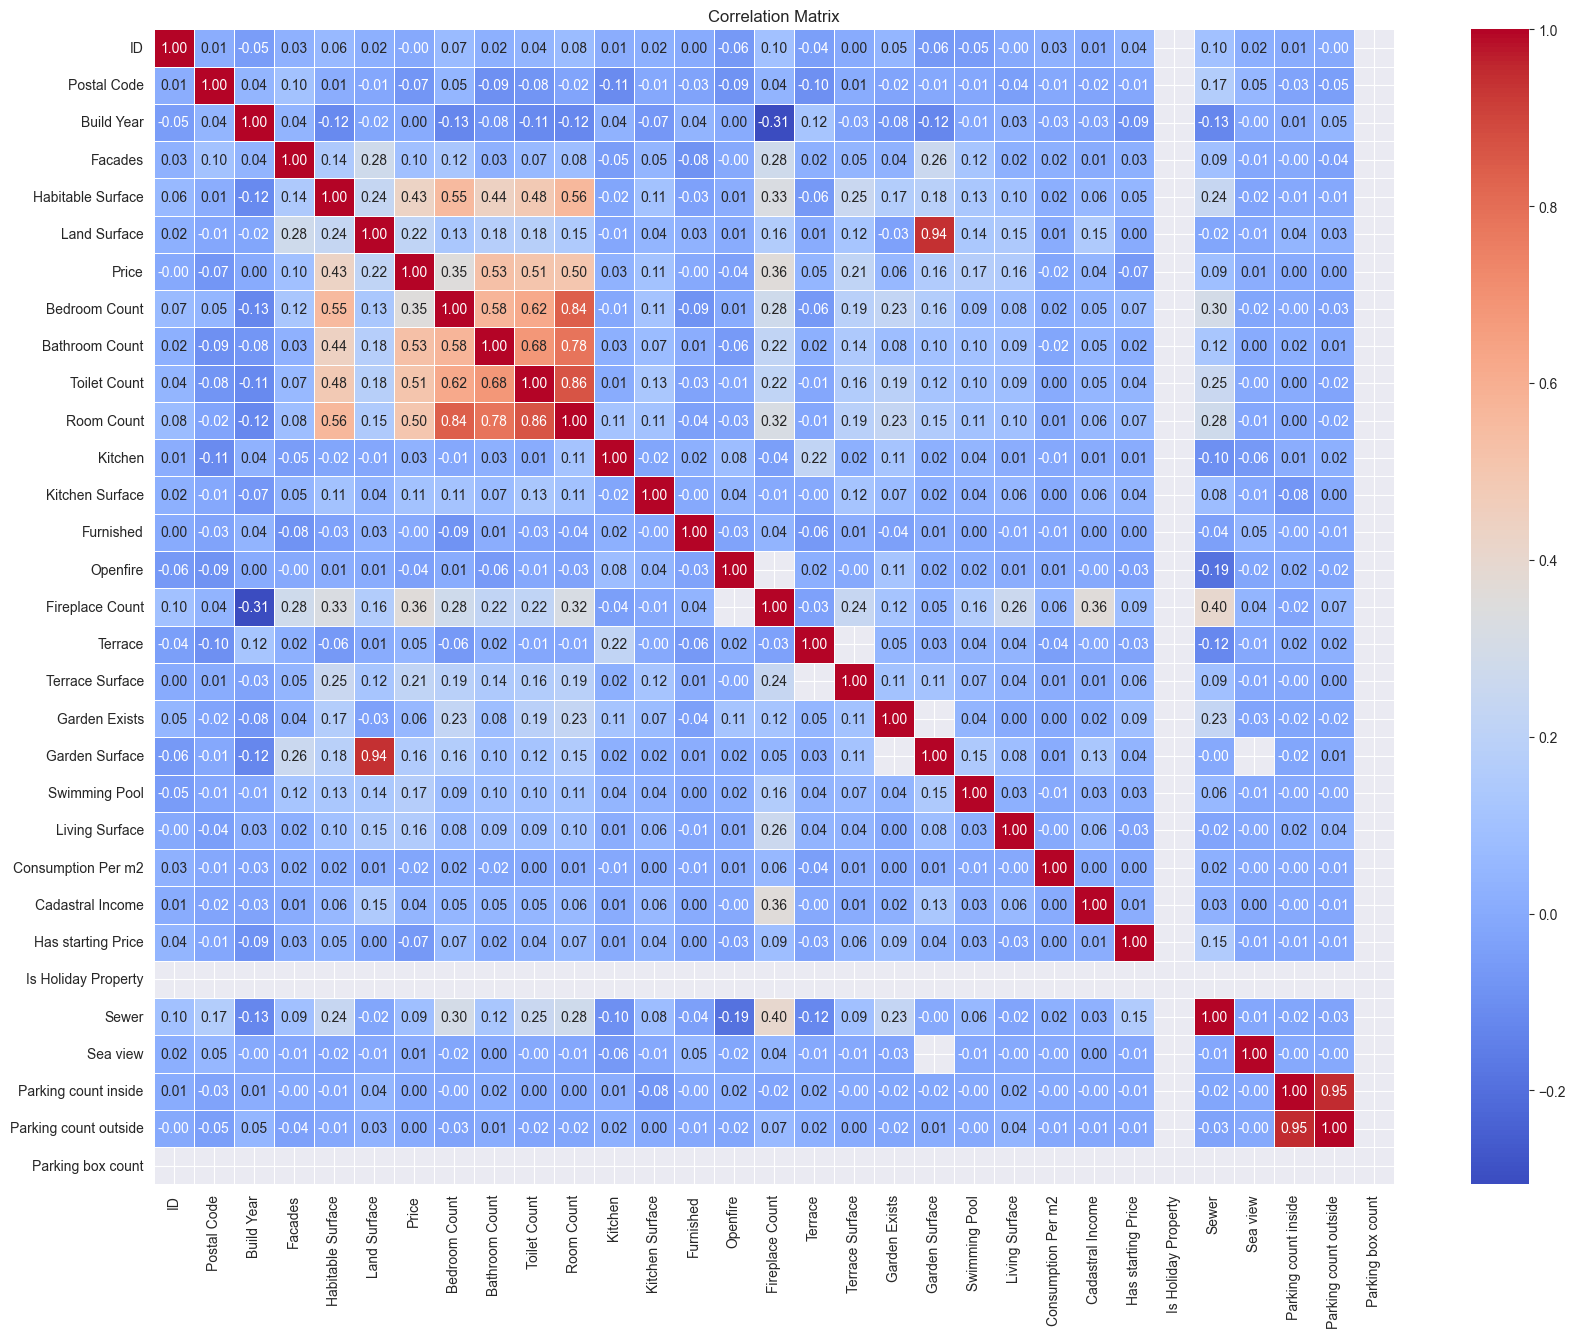

In [30]:
display_correlation_matrix(df=immo_AP_H)

In [31]:
interest_columns = ['Price', 'Postal Code', 'Build Year', 'Facades', 'Habitable Surface', 'Land Surface', 'Type', 'Subtype', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Surface', 'Kitchen Type', 'Furnished', 'Fireplace Count', 'Terrace', 'Terrace Surface', 'Garden Exists', 'Garden Surface', 'Swimming Pool', 'State of Building', 'Living Surface','EPC', 'Consumption Per m2', 'Heating Type', 'Sewer', 'Sea view', 'Parking count inside', 'Parking count outside', 'Province']

immo_AP_H = immo_AP_H[interest_columns]
immo_AP_H

,Price,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Bedroom Count,Bathroom Count,...,State of Building,Living Surface,EPC,Consumption Per m2,Heating Type,Sewer,Sea view,Parking count inside,Parking count outside,Province
0,220000.0,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,3.0,1.0,...,GOOD,34.0,C,187.0,FUELOIL,0,0,1.0,1.0,LUIK
7,339000.0,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,3.0,1.0,...,GOOD,30.0,B,113.0,GAS,0,0,NaN,1.0,OOST-VLAANDEREN
10,495000.0,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,2.0,1.0,...,GOOD,40.0,D,202.0,GAS,0,0,NaN,NaN,BRUSSEL
11,175000.0,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,2.0,1.0,...,GOOD,37.0,B,124.0,NaN,0,0,NaN,1.0,ANTWERPEN
12,289000.0,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,3.0,1.0,...,GOOD,30.0,G,383.0,NaN,0,0,NaN,NaN,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54527,220000.0,2200,1938.0,3.0,100.0,344.0,HOUSE,HOUSE,3.0,1.0,...,NaN,32.0,F,836.0,GAS,1,0,1.0,NaN,ANTWERPEN
54530,399000.0,9040,1955.0,4.0,168.0,153.0,HOUSE,HOUSE,3.0,2.0,...,GOOD,NaN,D,376.0,GAS,1,0,NaN,1.0,OOST-VLAANDEREN
54531,90000.0,4100,NaN,2.0,92.0,221.0,HOUSE,HOUSE,2.0,1.0,...,NaN,13.0,F,434.0,FUELOIL,1,0,NaN,NaN,LUIK
54533,349000.0,8000,NaN,NaN,79.0,43.0,HOUSE,HOUSE,3.0,2.0,...,JUST_RENOVATED,NaN,E,410.0,GAS,0,0,NaN,NaN,WEST-VLAANDEREN


In [32]:
# Numerical features

immo_AP_H.select_dtypes(include=['int', 'float']).columns

Index(['Price', 'Postal Code', 'Build Year', 'Facades', 'Habitable Surface',
       'Land Surface', 'Bedroom Count', 'Bathroom Count', 'Toilet Count',
       'Room Count', 'Kitchen Surface', 'Furnished', 'Fireplace Count',
       'Terrace', 'Terrace Surface', 'Garden Exists', 'Garden Surface',
       'Swimming Pool', 'Living Surface', 'Consumption Per m2', 'Sewer',
       'Sea view', 'Parking count inside', 'Parking count outside'],
      dtype='object')

In [33]:
# Categorical features

immo_AP_H.select_dtypes(include=['object']).columns

Index(['Type', 'Subtype', 'Kitchen Type', 'State of Building', 'EPC',
       'Heating Type', 'Province'],
      dtype='object')

In [34]:
immo_AP_H.isnull().sum()

Price                        1
Postal Code                  0
Build Year                6044
Facades                   5622
Habitable Surface          833
Land Surface             12889
Type                         0
Subtype                      1
Bedroom Count                0
Bathroom Count            2645
Toilet Count              5445
Room Count                 158
Kitchen Surface          14848
Kitchen Type              5962
Furnished                    0
Fireplace Count          18017
Terrace                      0
Terrace Surface           9418
Garden Exists                0
Garden Surface           17600
Swimming Pool                0
State of Building         7111
Living Surface           11960
EPC                       6979
Consumption Per m2        7807
Heating Type              9054
Sewer                        0
Sea view                     0
Parking count inside     14086
Parking count outside    14668
Province                     0
dtype: int64

In [35]:
immo_AP_H.isnull().mean()

Price                    0.000046
Postal Code              0.000000
Build Year               0.278757
Facades                  0.259293
Habitable Surface        0.038419
Land Surface             0.594456
Type                     0.000000
Subtype                  0.000046
Bedroom Count            0.000000
Bathroom Count           0.121991
Toilet Count             0.251130
Room Count               0.007287
Kitchen Surface          0.684808
Kitchen Type             0.274975
Furnished                0.000000
Fireplace Count          0.830966
Terrace                  0.000000
Terrace Surface          0.434370
Garden Exists            0.000000
Garden Surface           0.811733
Swimming Pool            0.000000
State of Building        0.327968
Living Surface           0.551610
EPC                      0.321880
Consumption Per m2       0.360068
Heating Type             0.417581
Sewer                    0.000000
Sea view                 0.000000
Parking count inside     0.649663
Parking count 

In [36]:
# 'Kitchen_surface', 'Fireplace Count', 'Garden Surface', 'Swimming Pool', 'Sea view', 'Parking count inside', 'Parking count outside' have high null values average
# We will just drop these columns

In [37]:
high_average_null_columns = ['Kitchen Surface', 'Fireplace Count', 'Garden Surface', 'Swimming Pool', 'Sea view', 'Parking count inside', 'Parking count outside', 'Sewer']

immo_AP_H = immo_AP_H.drop(columns=high_average_null_columns)
immo_AP_H.head()

,Price,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Bedroom Count,Bathroom Count,...,Furnished,Terrace,Terrace Surface,Garden Exists,State of Building,Living Surface,EPC,Consumption Per m2,Heating Type,Province
0,220000.0,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,3.0,1.0,...,0,1,NaN,0,GOOD,34.0,C,187.0,FUELOIL,LUIK
7,339000.0,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,3.0,1.0,...,0,1,NaN,1,GOOD,30.0,B,113.0,GAS,OOST-VLAANDEREN
10,495000.0,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,2.0,1.0,...,0,1,12.0,0,GOOD,40.0,D,202.0,GAS,BRUSSEL
11,175000.0,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,2.0,1.0,...,0,1,7.0,0,GOOD,37.0,B,124.0,NaN,ANTWERPEN
12,289000.0,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,3.0,1.0,...,0,1,2.0,0,GOOD,30.0,G,383.0,NaN,BRUSSEL


### Taking care of Categorical features

In [38]:
def display_percentage_missing_values(df: pd.DataFrame, column: str):
    print(f"Total observations: {df.shape[0]}")
    print(f"Total 'Building Year' missing values: {df[column].isnull().sum()}")
    print(f"Percentage of 'Building Year' missing values: {df[column].isnull().mean()}")
    

### Building Year

In [39]:
display_percentage_missing_values(df=immo_AP_H, column='Build Year')

Total observations: 21682
Total 'Building Year' missing values: 6044
Percentage of 'Building Year' missing values: 0.2787565722719306


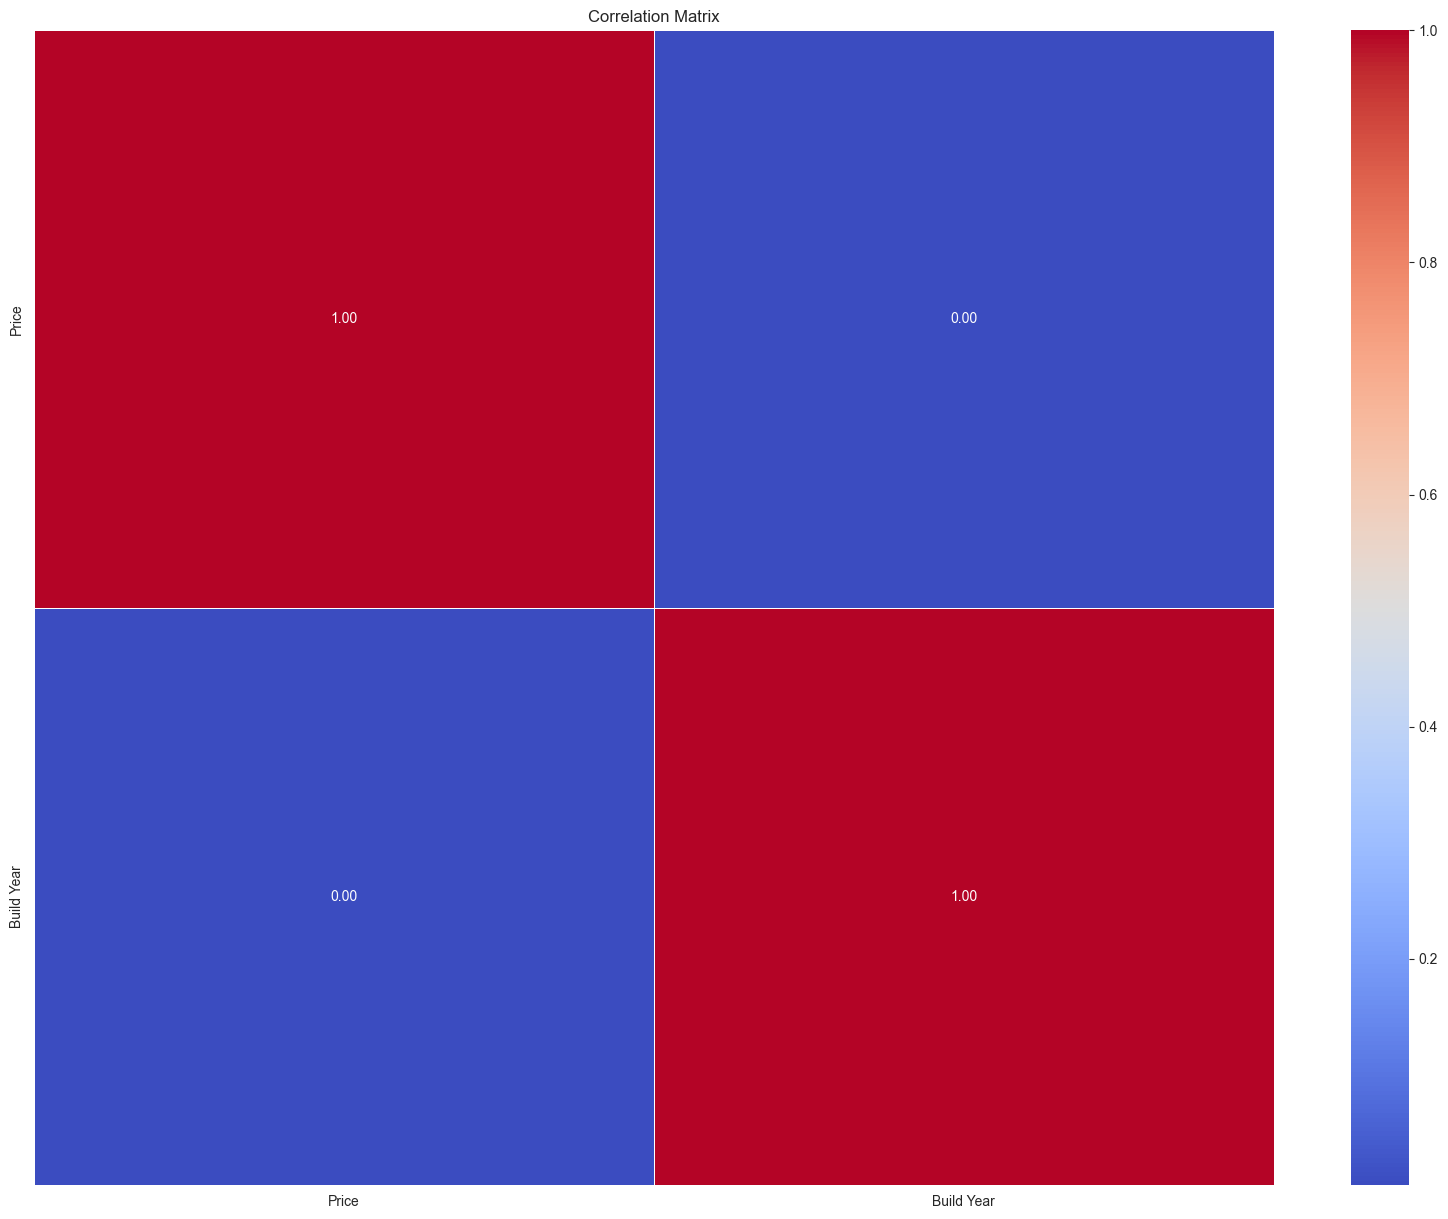

In [40]:
display_correlation_matrix(df=immo_AP_H, columns=['Price', 'Build Year'])

In [41]:
# Build Year is not correlated with Price. That's why we deleted

del immo_AP_H['Build Year']

### State of Building

In [42]:
# State of Building

immo_AP_H['State of Building'].unique()

array(['GOOD', 'AS_NEW', 'TO_RENOVATE', nan, 'TO_BE_DONE_UP',
       'JUST_RENOVATED', 'TO_RESTORE'], dtype=object)

In [43]:
display_percentage_missing_values(immo_AP_H, column='State of Building')

Total observations: 21682
Total 'Building Year' missing values: 7111
Percentage of 'Building Year' missing values: 0.3279678996402546


### EPC

In [44]:
immo_AP_H.EPC.unique()

array(['C', 'B', 'D', 'G', 'F', nan, 'A', 'E', 'A+', 'A++', 'G_E'],
      dtype=object)

In [45]:
display_percentage_missing_values(df=immo_AP_H, column='EPC')

Total observations: 21682
Total 'Building Year' missing values: 6979
Percentage of 'Building Year' missing values: 0.3218799003781939


### Kitchen Type

In [46]:
# Kitchen Type

immo_AP_H['Kitchen Type'].unique()

array([nan, 'INSTALLED', 'HYPER_EQUIPPED', 'SEMI_EQUIPPED',
       'USA_HYPER_EQUIPPED', 'USA_INSTALLED', 'USA_SEMI_EQUIPPED',
       'NOT_INSTALLED', 'USA_UNINSTALLED'], dtype=object)

In [47]:
display_percentage_missing_values(df=immo_AP_H, column='Kitchen Type')

Total observations: 21682
Total 'Building Year' missing values: 5962
Percentage of 'Building Year' missing values: 0.2749746333364081


In [48]:
# checking for duplicated rows

immo_AP_H.duplicated().sum()

3091

In [49]:
immo_AP_H.drop_duplicates(inplace=True)

In [50]:
immo_AP_H.duplicated().sum()

0

In [51]:
immo_AP = immo_AP_H[immo_AP_H['Type'] == 'APARTMENT']
immo_H = immo_AP_H[immo_AP_H['Type'] == 'HOUSE']

In [52]:
immo_AP.duplicated().sum()

0

In [53]:
immo_AP.to_csv('../data/interim/immo_apartments.csv', index=False)
immo_H.to_csv('../data/interim/immo_houses.csv', index=False)

In [54]:
immo_H

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Type,Subtype,Bedroom Count,Bathroom Count,Toilet Count,...,Furnished,Terrace,Terrace Surface,Garden Exists,State of Building,Living Surface,EPC,Consumption Per m2,Heating Type,Province
216,378500.0,9800,2.0,123.0,175.0,HOUSE,HOUSE,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,30.0,NaN,NaN,NaN,OOST-VLAANDEREN
249,381000.0,9800,2.0,123.0,191.0,HOUSE,HOUSE,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,33.0,NaN,NaN,NaN,OOST-VLAANDEREN
260,399500.0,9800,3.0,123.0,168.0,HOUSE,VILLA,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,31.0,NaN,NaN,GAS,OOST-VLAANDEREN
271,410400.0,9800,3.0,123.0,234.0,HOUSE,VILLA,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
282,411900.0,9800,3.0,123.0,252.0,HOUSE,VILLA,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54523,229000.0,8800,2.0,149.0,289.0,HOUSE,HOUSE,4.0,1.0,1.0,...,0,1,NaN,0,GOOD,22.0,F,635.0,NaN,WEST-VLAANDEREN
54527,220000.0,2200,3.0,100.0,344.0,HOUSE,HOUSE,3.0,1.0,NaN,...,0,0,NaN,0,NaN,32.0,F,836.0,GAS,ANTWERPEN
54530,399000.0,9040,4.0,168.0,153.0,HOUSE,HOUSE,3.0,2.0,2.0,...,0,0,NaN,0,GOOD,NaN,D,376.0,GAS,OOST-VLAANDEREN
54531,90000.0,4100,2.0,92.0,221.0,HOUSE,HOUSE,2.0,1.0,NaN,...,0,0,NaN,1,NaN,13.0,F,434.0,FUELOIL,LUIK
